# 1 Feedforward: Building a ReLU neural net- work


## 1. Draw a network with:

• 2 inputs

• 1 hidden layers with 4 hidden units and a 

• 1-class output (for binary classification)

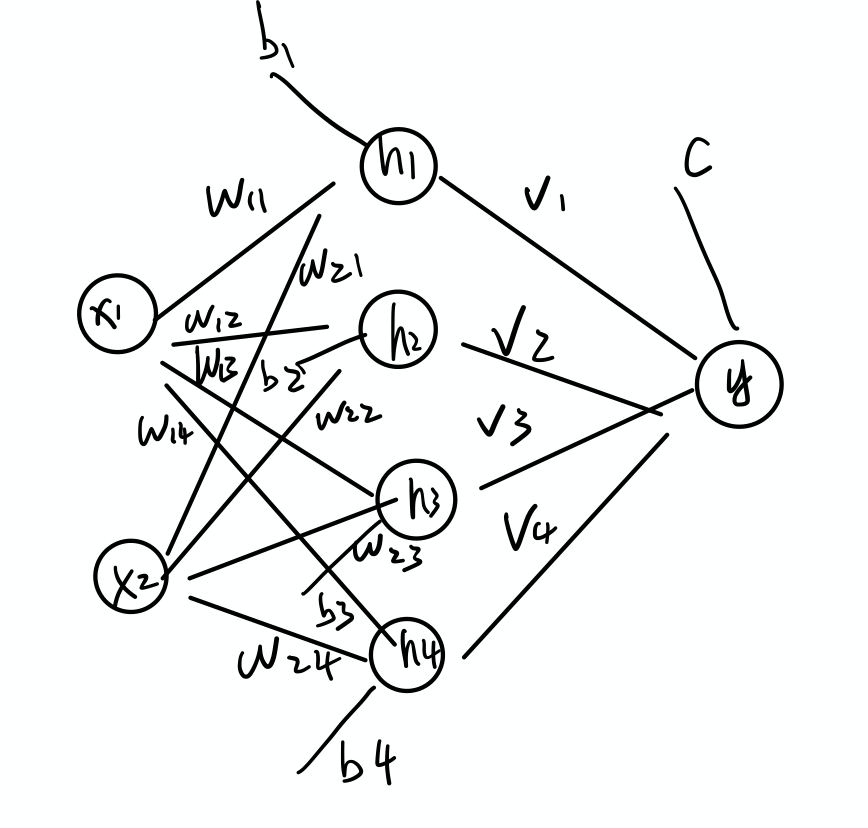

## 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

h1 = max(0,x1*w11+x2*w21+b1)

h2 = max(0,x1*w12+x2*w22+b2)

h3 = max(0,x1*w13+x2*w23+b3)

h4 = max(0,x1*w14+x2*w25+b4)

y_in =h1*v1+h2*v2+h3*v3+h4*v4+c

y_out = 1/(1+e^y_in)


## 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [7]:
import numpy as np
def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def nn_layer(x, w, b, f):
    return f(np.dot(x, w) + b)

def ff_nn_Relu(X,W_1,b_1,f_1,W_2,b_2,f_2):
    H = nn_layer(X, W_1, b_1, f_1)
    Y_hat = nn_layer(H, W_2, b_2, f_2)
    print(Y_hat)
    return Y_hat

## 4.what are the class probabilities associated with the forward pass of each sample?

In [3]:
X = [np.array([1,-1]),np.array([0,-1]),np.array([1,1])]
W_1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b=np.array([0,0,1,0])
v=np.array([1,0,-1,1])
c=1
for x in X:
    ff_nn_Relu(x,W_1,b,relu,v,c,sigmoid)
    

0.8175744761936437
0.6224593312018546
0.9241418199787566


# 2 Gradient Descent

## 1. What are the partial derivatives of f with respect to x and to y?


In [4]:

 
from IPython.display import Latex

Latex(r"""\[ \frac{\partial f}{\partial x}
= -3x^2+100x-200y^2\]""")

<IPython.core.display.Latex object>

In [5]:
Latex(r"""\[ \frac{\partial f}{\partial y}
= 400y(2y^2-x)\]""")

<IPython.core.display.Latex object>

## 2. Create a visualization of the contours of this function.

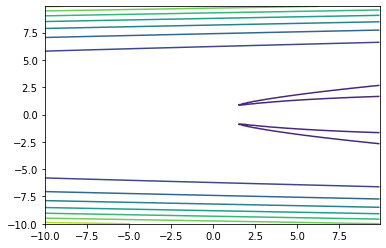

In [9]:
import matplotlib.pyplot as plt
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)

## 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=0.0000005):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point=starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)


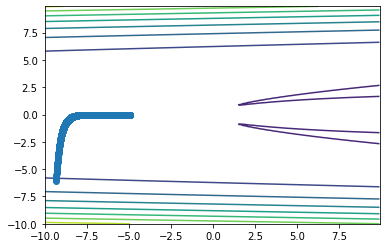

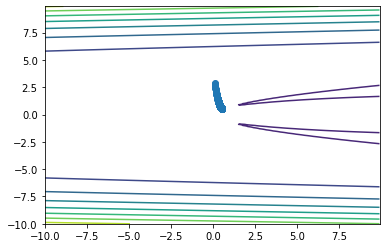

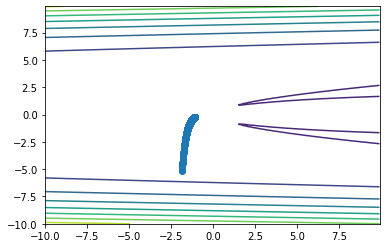

In [8]:
for i in [0.000001,0.000005,0.0000005]:
  traj = grad_descent(iterations=5000, learning_rate=i)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

## 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad=grad_f(point)
        v = alpha * v + epsilon *grad
        point = point - v
        trajectory.append(point)
    
    return np.array(trajectory)

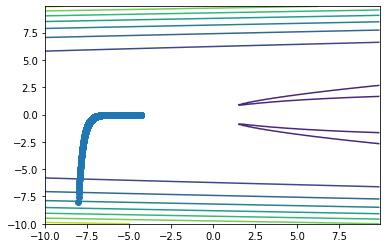

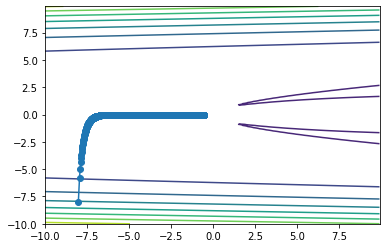

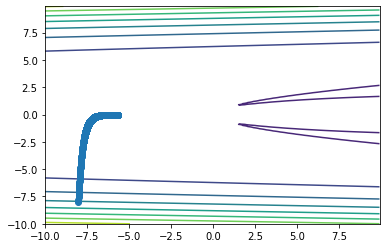

In [10]:

for i in [0.000001,0.000005,0.0000005]:
  traj = grad_descent_with_momentum(starting_point=np.array([-8,-8]),iterations=5000,epsilon=i,alpha=.0005)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

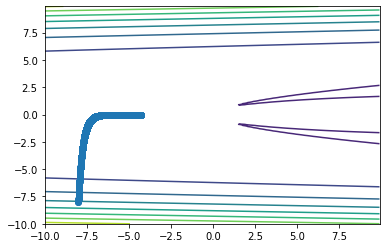

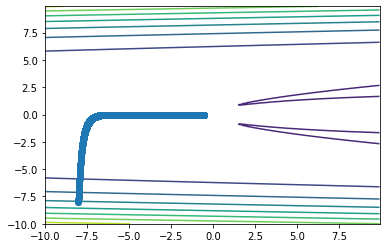

In [11]:
for i in [0.5,0.9]:
  traj = grad_descent_with_momentum(starting_point=np.array([-8,-8]),iterations=50000,epsilon=0.00000005,alpha=i)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

# 3 Backprop

## 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


In [12]:
ei = (y/y_hat - (1-y)/(1-y_hat))

dL/dc = ei* y_hat*(1-y_hat) 

dL_dv1 = ei * y_hat*(1-y_hat)*h1(out)
dL_dv2 = ei * y_hat*(1-y_hat)*h2(out)
dL_dv3 = ei * y_hat*(1-y_hat)*h3(out)
dL_dv4 = ei * y_hat*(1-y_hat)*h4(out)

dL_db1 = ei * y_hat*(1-y_hat) *v1
dL_db2 = ei * y_hat*(1-y_hat) *v2
dL_db3 = ei * y_hat*(1-y_hat) *v3
dL_db4 = ei * y_hat*(1-y_hat) *v4

dL_dwij = xi * ei * y_hat*(1-y_hat) *vj
             

SyntaxError: ignored


## 2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [13]:
import tensorflow as tf

loss = tf.keras.losses.BinaryCrossentropy()
def nn_layer(x, params):
    h = tf.nn.relu(tf.matmul(params[0],x)+params[1])
    yhat = tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])
    return yhat
def grad_f(params,x,y):
    with tf.GradientTape() as tape:
        yhat = nn_layer(x,params)
        f = loss(y,yhat) 
    print(tape.gradient(f,params))
    return(tape.gradient(f,params))

## 3. Generate a synthetic dataset like the XOR pattern (see below).

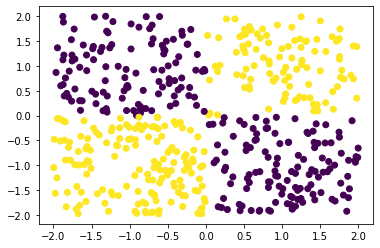

In [14]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1


plt.scatter(x[:,0],x[:,1],c=y)

## 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [24]:
def grad_step(x, y, params,step_size):
  with tf.GradientTape() as tape:
    yhat=nn_layer(x, params)
    f = loss(y,yhat) 
    grads = tape.gradient(f,params)
  for var, grad in zip(params, grads):
      var.assign(var - step_size * grad)
  return f

def nn_grad_desc(x, y, step_size, n_iters):
  w = tf.random.uniform((4,2), minval=-1, maxval=1)
  b = tf.random.uniform((4,1), minval=-1, maxval=1)
  v = tf.random.uniform((1, 4), minval=-1, maxval=1)
  c = tf.random.uniform((1,), minval=-1, maxval=1)

  params = [tf.Variable(p) for p in [w, b, v, c]]    
  losses = []
  for i in range(n_iters):
    losses.append(grad_step(x.T, y, params, step_size))
  return losses, params

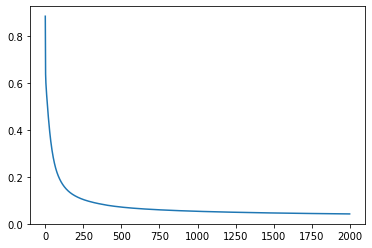

In [25]:
losses, params = nn_grad_desc(x, y, 0.5, 2000)
plt.plot(losses)
plt.show()

## 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [17]:
def grad_step(x, y, params,alpha, epsilon, v_):
  with tf.GradientTape() as tape:
    yhat=nn_layer(x, params)
    f = loss(y,yhat) 
    grads = tape.gradient(f,params)
  for var, grad, vv in zip(params, grads, v_):
      var.assign(var - alpha * vv - epsilon *grad)
  return f

def grad_descent(x, y, alpha, epsilon, n_iters):
  w = tf.random.uniform((4,2), minval=-1, maxval=1)
  b = tf.random.uniform((4,1), minval=-1, maxval=1)
  v = tf.random.uniform((1, 4), minval=-1, maxval=1)
  c = tf.random.uniform((1,), minval=-1, maxval=1)
  v_ = tf.zeros(17)
  params = [tf.Variable(p) for p in [w, b, v, c]]    
  losses = []
  for i in range(n_iters):
    losses.append(grad_step(x.T, y, params, alpha, epsilon, v_))
  return losses, params

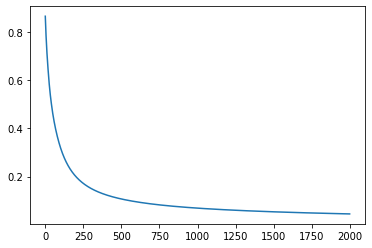

In [20]:
losses, params = grad_descent(x, y, 0.5, 0.1, 2000  )
plt.plot(losses)

it converge slower with momentum than without but the difference is slight


## 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

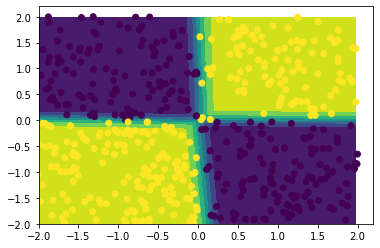

In [21]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)

x_com = np.c_[X1.ravel(), X2.ravel()]
h = tf.nn.relu(tf.matmul(params[0],x_com.T)+params[1])
yhat = tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])
fig, ax = plt.subplots()

CS = ax.contourf(X1, X2, yhat.numpy().reshape(160,160))

plt.scatter(x[:,0],x[:,1],c=y)

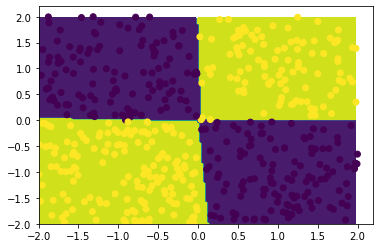

In [22]:
z = yhat.numpy()
z =  ß
plt.contourf(X1,X2 , z)
plt.scatter(x[:, 0], x[:, 1], c=y)